# Setup

## Import Libraries
### General Libraries

In [1]:
import sys
print ('Python version: {}'.format(sys.version))
import pandas as pd
print ('pandas version: {}'.format(pd.__version__))
import matplotlib
print ('matplotlib version: {}'.format(matplotlib.__version__))
import numpy as np
print ('NumPy version: {}'.format(np.__version__))
import scipy as sp
print ('SciPy version: {}'.format(sp.__version__))
import IPython
print ('IPython version: {}'.format(IPython.__version__))
import sklearn
print ('scikit-learn version: {}'.format(sklearn.__version__))

import random
import time
import warnings
import copy
warnings.filterwarnings('ignore')
print ('-*'*20)
from subprocess import check_output
print (check_output(['ls', './data']).decode('utf8'))

Python version: 3.9.1 (v3.9.1:1e5d33e9b9, Dec  7 2020, 12:10:52) 
[Clang 6.0 (clang-600.0.57)]
pandas version: 1.2.3
matplotlib version: 3.3.3
NumPy version: 1.19.5
SciPy version: 1.6.0
IPython version: 7.21.0
scikit-learn version: 0.24.1
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
2019_Crash_1_Database.csv



### Visualization Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Machine Learning Libraries

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.utils import shuffle

## Import Data

In [4]:
data_original = pd.read_csv('./data/2019_Crash_1_Database.csv', parse_dates = ['crash_date', 'crash_hour', 'crash_time'])
data_raw = data_original.copy(deep=True)
data = pd.DataFrame()
data_dummies = pd.DataFrame()
data_raw_fields_to_drop = []

In [5]:
print (len(data_raw))
print ()
for column in data_raw:
    print (column)


160186

route
milepoint
num_tot_kil
num_tot_inj
crash_date
f_harm_ev_cd1
m_harm_ev_cd1
man_coll_cd
crash_type
surf_cond_cd
crash_num
parish_cd
crash_hour
intersection
invest_agency_cd
travel_dirs
prior_movements
crash_year
csect
logmile
lrs_id
lrs_logmile
adt
alcohol
veh_type_cd1
veh_type_cd2
quadrant
spotted_by
intersection_id
severity_cd
city_cd
roadway_departure
lane_departure
road_rel_cd
hwy_class
contributing_factor
location_type
veh_severity_cd
ORIG_LATITUDE
ORIG_LONGITUDE
DOTD_LATITUDE
DOTD_LONGITUDE
parish_cd.1
hwy_type_cd
pri_hwy_num
bypass
milepost
pri_road_name
pri_dist
pri_measure
pri_dir
inter_road
dr_age_1
dr_age_2
dr_sex_1
dr_sex_2
pri_contrib_fac_cd
sec_contrib_fac_cd
vision_obscure_1
vision_obscure_2
movement_reason_1
movement_reason_2
ped_actions_1
ped_actions_2
veh_lighting_1
veh_lighting_2
traff_cntl_cond_1
traff_cntl_cond_2
pri_road_dir
lighting_cd
num_veh
crash_time
dr_cond_cd1
dr_cond_cd2
veh_cond_cd1
veh_cond_cd2


In [6]:
for field in data_raw:
    print (data_raw[field].nunique(), field)

1024 route
53807 milepoint
5 num_tot_kil
27 num_tot_inj
365 crash_date
45 f_harm_ev_cd1
45 m_harm_ev_cd1
12 man_coll_cd
19 crash_type
10 surf_cond_cd
160186 crash_num
64 parish_cd
25 crash_hour
2 intersection
4 invest_agency_cd
199 travel_dirs
1322 prior_movements
1 crash_year
2141 csect
18202 logmile
4788 lrs_id
18092 lrs_logmile
748 adt
2 alcohol
22 veh_type_cd1
22 veh_type_cd2
5 quadrant
5 spotted_by
15036 intersection_id
5 severity_cd
20 city_cd
2 roadway_departure
2 lane_departure
11 road_rel_cd
19 hwy_class
2 contributing_factor
8 location_type
5 veh_severity_cd
91539 ORIG_LATITUDE
87921 ORIG_LONGITUDE
127282 DOTD_LATITUDE
130752 DOTD_LONGITUDE
65 parish_cd.1
6 hwy_type_cd
1006 pri_hwy_num
47 bypass
7172 milepost
15723 pri_road_name
7596 pri_dist
3 pri_measure
13 pri_dir
35370 inter_road
101 dr_age_1
97 dr_age_2
3 dr_sex_1
3 dr_sex_2
15 pri_contrib_fac_cd
15 sec_contrib_fac_cd
17 vision_obscure_1
17 vision_obscure_2
19 movement_reason_1
19 movement_reason_2
14 ped_actions_1
1 ped

In [7]:
print (data_raw.head())

  route  milepoint  num_tot_kil  num_tot_inj crash_date f_harm_ev_cd1  \
0     0        NaN            0            0 2019-01-01            S    
1     0        NaN            0            0 2019-01-01            S    
2     0        NaN            0            0 2019-01-01            S    
3     0        NaN            0            0 2019-01-01            R    
4     0        NaN            0            1 2019-01-01            S    

  m_harm_ev_cd1 man_coll_cd crash_type surf_cond_cd  ... traff_cntl_cond_1  \
0            S            D          S            A  ...                 A   
1                         D          B            B  ...                 A   
2            S            C          S            A  ...                 Q   
3            R            A          N            A  ...                 S   
4            S            B          S            A  ...                 R   

   traff_cntl_cond_2 pri_road_dir  lighting_cd num_veh          crash_time  \
0             

# Dependent Field

In [8]:
data_raw['fatal'] = data_raw['num_tot_kil'].apply(lambda x: 1 if x>0 else 0)
data['fatal'] = data_raw['fatal']
# Number of fatalities in data set
(len(data) + data['fatal'].sum())/2

80433.5

# Consider Independent Fields

In [9]:
data_fields = []
data_dummy_fields = []

## Fields with Time
0 = Monday

In [10]:
data_raw['crash_month'] = data_raw['crash_date'].dt.month
data_raw['crash_dayofweek'] = data_raw['crash_date'].dt.dayofweek
data_raw.crash_hour.replace(['  '], 25, inplace=True)
data_raw['crash_hour'] = data_raw['crash_hour'].astype(int)

print (data.head())
print (data.info())

   fatal
0      0
1      0
2      0
3      0
4      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160186 entries, 0 to 160185
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   fatal   160186 non-null  int64
dtypes: int64(1)
memory usage: 1.2 MB
None


In [11]:
field = 'crash_month'
data_raw.groupby(field).agg({'fatal': ['sum','count', 'mean']})

fatal                 
              sum  count      mean
crash_month                       
1              44  12762  0.003448
2              49  12342  0.003970
3              43  14443  0.002977
4              65  13818  0.004704
5              67  14382  0.004659
6              57  12208  0.004669
7              58  12317  0.004709
8              59  13475  0.004378
9              61  13053  0.004673
10             60  14820  0.004049
11             55  13240  0.004154
12             63  13326  0.004728

In [12]:
field = 'crash_dayofweek'
data_raw.groupby(field).agg({'fatal': ['sum','count', 'mean']})

fatal                 
                  sum  count      mean
crash_dayofweek                       
0                  97  23411  0.004143
1                  89  24229  0.003673
2                  76  24449  0.003109
3                  91  25079  0.003629
4                 113  27230  0.004150
5                 104  19729  0.005271
6                 111  16059  0.006912

In [13]:
field = 'crash_hour'
A = data_raw.groupby(field).agg({'fatal': ['sum','count', 'mean']})
A

fatal                 
             sum  count      mean
crash_hour                       
0             17   2033  0.008362
1             27   1842  0.014658
2             21   1694  0.012397
3             14   1457  0.009609
4             19   1582  0.012010
5             29   2762  0.010500
6             29   4541  0.006386
7             26   8951  0.002905
8             14   7711  0.001816
9             17   6405  0.002654
10            23   7213  0.003189
11            35   8758  0.003996
12            23  10601  0.002170
13            25   9842  0.002540
14            35  10706  0.003269
15            34  13081  0.002599
16            32  13379  0.002392
17            33  13943  0.002367
18            35  10135  0.003453
19            37   6605  0.005602
20            41   5404  0.007587
21            46   4662  0.009867
22            41   3602  0.011383
23            24   2682  0.008949
25             4    595  0.006723

In [14]:
field = 'crash_hour'
A = data_raw[[field, 'fatal']].groupby([field], as_index=False).mean()#.sort_values(by='fatal', ascending=False)
A

,crash_hour,fatal
0,0,0.008362
1,1,0.014658
2,2,0.012397
3,3,0.009609
4,4,0.012010
5,5,0.010500
6,6,0.006386
7,7,0.002905
8,8,0.001816
9,9,0.002654


Exclude crash_month.  Just noise.  

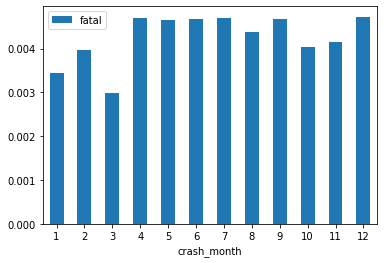

In [15]:
field = 'crash_month'
A = data_raw[[field, 'fatal']].groupby([field], as_index=False).mean()#.sort_values(by='fatal', ascending=False)
ax = A.plot.bar(x=field, y='fatal', rot=0)

Add crash_dayofweek to data as a dummy.

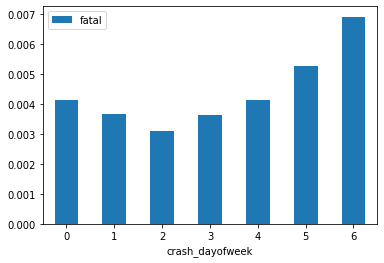

In [16]:
field = 'crash_dayofweek'
data_fields.append(field)
data_dummy_fields.append(field)
A = data_raw[[field, 'fatal']].groupby([field], as_index=False).mean()#.sort_values(by='fatal', ascending=False)
ax = A.plot.bar(x=field, y='fatal', rot=0)

Add crash_hour to data as a dummy.

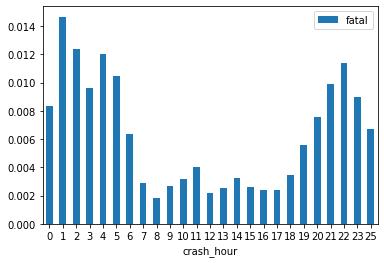

In [17]:
field = 'crash_hour'
data_fields.append(field)
data_dummy_fields.append(field)
A = data_raw[[field, 'fatal']].groupby([field], as_index=False).mean()#.sort_values(by='fatal', ascending=False)
ax = A.plot.bar(x=field, y='fatal', rot=0)

## Roadway and Lane Departure, and Intersection
Add all to data.

In [18]:
field = 'roadway_departure'
data_fields.append(field)
di = {'No':0, 'Yes':1}
data_raw[field].replace(di, inplace=True)
A = data_raw[[field, 'fatal']].groupby([field], as_index=False).mean()#.sort_values(by='fatal', ascending=False)
A

,roadway_departure,fatal
0,0,0.002085
1,1,0.014550


In [19]:
field = 'lane_departure'
data_fields.append(field)
di = {'No':0, 'Yes':1}
data_raw[field].replace(di, inplace=True)
A = data_raw[[field, 'fatal']].groupby([field], as_index=False).mean()#.sort_values(by='fatal', ascending=False)
A

,lane_departure,fatal
0,0,0.001577
1,1,0.014914


In [20]:
field = 'intersection'
data_fields.append(field)
A = data_raw[[field, 'fatal']].groupby([field], as_index=False).mean()#.sort_values(by='fatal', ascending=False)
A

,intersection,fatal
0,0,0.005299
1,1,0.002447


## Parish
Definitely add this one to data.

    parish_cd     fatal
41         42  0.049020
21         22  0.038961
45         46  0.030488
18         19  0.026738
13         14  0.026042
..        ...       ...
25         26  0.001938
27         28  0.001723
32         33  0.000000
10         11  0.000000
63         64  0.000000

[64 rows x 2 columns]


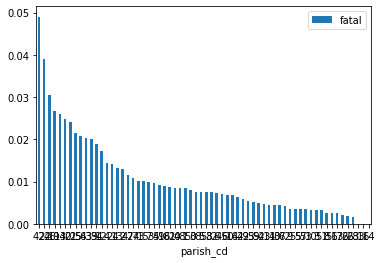

In [21]:
field = 'parish_cd'
data_fields.append(field)
data_dummy_fields.append(field)
A = data_raw[[field, 'fatal']].groupby([field], as_index=False).mean().sort_values(by='fatal', ascending=False)
print (A)
ax = A.plot.bar(x=field, y='fatal', rot=0)

## Alcohol

In [22]:
field = 'alcohol'
data_fields.append(field)
A = data_raw[[field, 'fatal']].groupby([field], as_index=False).mean().sort_values(by='fatal', ascending=False)
A

,alcohol,fatal
1,1,0.032646
0,0,0.003401


## Interstate?
Apparently makes no difference.  

In [23]:
data_raw['interstate'] = np.where(data_raw['route'].str.contains('I'), 1, 0)
field = 'interstate'
#data_fields.append(field)
A = data_raw[[field, 'fatal']].groupby([field], as_index=False).mean().sort_values(by='fatal', ascending=False)
A

,interstate,fatal
1,1,0.004405
0,0,0.004228


# Type of Vehicle?
'E' is motorcycle
'G' is off-road vehicle (ATV?)
Definitely include.

In [24]:
field = 'veh_type_cd1'
data_fields.append(field)
data_dummy_fields.append(field)
A = data_raw[[field, 'fatal']].groupby([field], as_index=False).mean().sort_values(by='fatal', ascending=False)
A

,veh_type_cd1,fatal
7,G,0.097902
5,E,0.067021
6,F,0.015487
13,M,0.013514
14,N,0.012500
20,V,0.010526
16,Q,0.010372
10,J,0.006993
2,B,0.004841
12,L,0.004394


In [25]:
field = 'veh_type_cd2'
data_fields.append(field)
data_dummy_fields.append(field)
A = data_raw[[field, 'fatal']].groupby([field], as_index=False).mean().sort_values(by='fatal', ascending=False)
A

,veh_type_cd2,fatal
5,E,0.042208
19,T,0.041096
6,F,0.031532
20,V,0.018868
16,Q,0.014650
14,N,0.014423
0,,0.014148
4,D,0.010331
15,P,0.008568
12,L,0.008276


## Pedestrian?

In [26]:
field = 'ped_actions_1'
data_raw[field] = data_raw[field].fillna(0)
data_raw[field].replace([' '],0, inplace=True)
data_fields.append(field)
data_dummy_fields.append(field)
A = data_raw[[field, 'fatal']].groupby([field], as_index=False).mean().sort_values(by='fatal', ascending=False)
A

,ped_actions_1,fatal
5,E,0.285714
12,Y,0.181818
8,H,0.166667
7,G,0.133333
6,F,0.116883
3,C,0.115607
9,I,0.100000
2,B,0.088235
13,Z,0.085890
4,D,0.066667


## Driver Characteristics

### Age
- Thousands of them are listed as 200 years old. 
- If the driver is elderly, higher chance of fatality.  

In [27]:
field = 'dr_age_1'
data_raw[field] = data_raw[field].fillna(0)
data_raw[field] = np.where(data_raw[field] > 100, 0, data_raw[field])
data_raw[field] = np.where(data_raw[field] < 15, 0, data_raw[field])

data_raw['dr_age_1_cuts'] = pd.cut(data_raw[field], bins=10)

data_fields.append('dr_age_1_cuts')
data_dummy_fields.append('dr_age_1_cuts')
A = data_raw[['dr_age_1_cuts', 'fatal']].groupby(['dr_age_1_cuts'], as_index=False).mean().sort_values(by='fatal', ascending=False)
A

,dr_age_1_cuts,fatal
9,"(89.1, 99.0]",0.020000
8,"(79.2, 89.1]",0.010592
5,"(49.5, 59.4]",0.005699
4,"(39.6, 49.5]",0.005594
7,"(69.3, 79.2]",0.005444
6,"(59.4, 69.3]",0.004854
3,"(29.7, 39.6]",0.004678
2,"(19.8, 29.7]",0.003778
1,"(9.9, 19.8]",0.002730
0,"(-0.099, 9.9]",0.001235


In [28]:
A = data_raw[(data_raw['fatal']==1)]
A['dr_age_2'].value_counts()

200.0    21
56.0     12
39.0     11
29.0     10
21.0      9
         ..
89.0      1
67.0      1
69.0      1
63.0      1
77.0      1
Name: dr_age_2, Length: 68, dtype: int64

In [29]:
field = 'dr_age_2'

data_raw['temp'] = pd.cut(data_raw[field], bins=10)
data_raw[field] = data_raw['temp'].fillna(data_raw[field])
del data_raw['temp']

#dat['temp'] = pd.qcut(dat[i][dat[i]>0], 10, labels=False, duplicates='drop')
#dat[i] = dat['temp'].fillna(df[i])
#del df['temp']
#
#data_raw['dr_age_2_cuts'] = pd.cut(data_raw[field], bins=10)
#
#data_fields.append('dr_age_2_cuts')
#data_dummy_fields.append('dr_age_2_cuts')
#A = data_raw[['dr_age_2_cuts', 'fatal']].groupby(['dr_age_2_cuts'], as_index=False).sum().sort_values(by='fatal', ascending=False)
#A
A = data_raw[[field, 'fatal']].groupby([field], as_index=False).sum().sort_values(by='fatal', ascending=False)
A

ValueError: Cannot setitem on a Categorical with a new category, set the categories first

## Add fields to data

In [ ]:
for field in data_fields:
    data[field] = data_raw[field]
    print (field)

### Get Dummies

In [ ]:
print (data_dummy_fields)

In [ ]:
for field in data_dummy_fields:
    data = pd.get_dummies(data,columns=[field],drop_first=False)
for x in data:
    print (x)
print (data.head())

# Split into 'train' and 'test' sets, with same proportion of positive and negative in each.

In [ ]:
data_positive = data[data['fatal'] == 1]
data_negative = data[data['fatal'] == -1]
train_positive, test_positive = train_test_split(data_positive, test_size=0.2)
train_negative, test_negative = train_test_split(data_negative, test_size=0.2)
train = pd.concat([train_positive, train_negative])
test = pd.concat([test_positive, test_negative])
# Randomly shuffle the rows of the train and test sets,
# because otherwise they have the positive on top and the negative on the bottom.
# "shuffle" is an sklearn function.
train = shuffle(train)
test = shuffle(test)
x_train = train.drop(['fatal'], axis=1)
y_train = train['fatal']
x_test = test.drop(['fatal'], axis=1)
y_test = test['fatal']

#x_train = train[['fatal','fatal']]
#x_test = test[['fatal','fatal']]

#x_train = train[['crash_hour_1','crash_hour_1']]
#x_test = test[['crash_hour_1', 'crash_hour_1']]

print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Run ML Models

In [ ]:
Models = [
    LinearSVC(),
    SGDClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),        
    GaussianNB(), 
    Perceptron(),
    KNeighborsClassifier(n_neighbors = 3), 
    SVC(),
]

#By definition a confusion matrix C  is such that 
#C[i][j] is equal to the number of observations 
#known to be in group i and predicted to be in group j.

#Thus in binary classification, the count of 
#true negatives is C[0][0],
#false negatives is C[1][0], 
#true positives is C[1][1],
# and false positives is C[0][1].



for model in Models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = round(model.score(x_train,y_train) * 100, 2)
    precision = round(precision_score(y_test, y_pred, average='macro')*100,2)
    recall = round(recall_score(y_test, y_pred)*100,2)
    f1 = round(f1_score(y_test, y_pred)*100,2)
    C = confusion_matrix(y_test, y_pred)

    print (accuracy, precision, recall, f1, model)
    print (C)